In [4]:
from scipy.special import softmax
import matplotlib.pyplot as plt
import numpy as np
import re

In [5]:
# weight_file = "weights.txt"
weight_file = "weights-unfrozen.txt"

In [6]:
with open(weight_file, "r") as f:
    content = f.read()
    content = content.replace("\n", "")

In [7]:
weights = re.findall(r"tensor\((\[[\s\d\.\,-]+\])", content)
weights = [softmax([float(n) for n in re.findall(r"[-\d\.]+", w)]) for w in weights]
len(weights)

25

[2.57342745e-10 3.01572012e-10 4.11705725e-10 6.82531605e-10
 2.27062144e-09 7.38007181e-07 7.20383255e-05 3.29276649e-04
 1.08516070e-04 1.22433553e-06 8.19536263e-08 7.50435387e-07
 8.19806602e-06 1.88664152e-06 1.68505512e-06 4.55546718e-04
 2.16978501e-04 1.34612230e-04 1.14319628e-04 2.25759091e-06
 7.72385184e-05 1.36560599e-06 9.55776157e-09 2.87583480e-03
 9.95597437e-01]


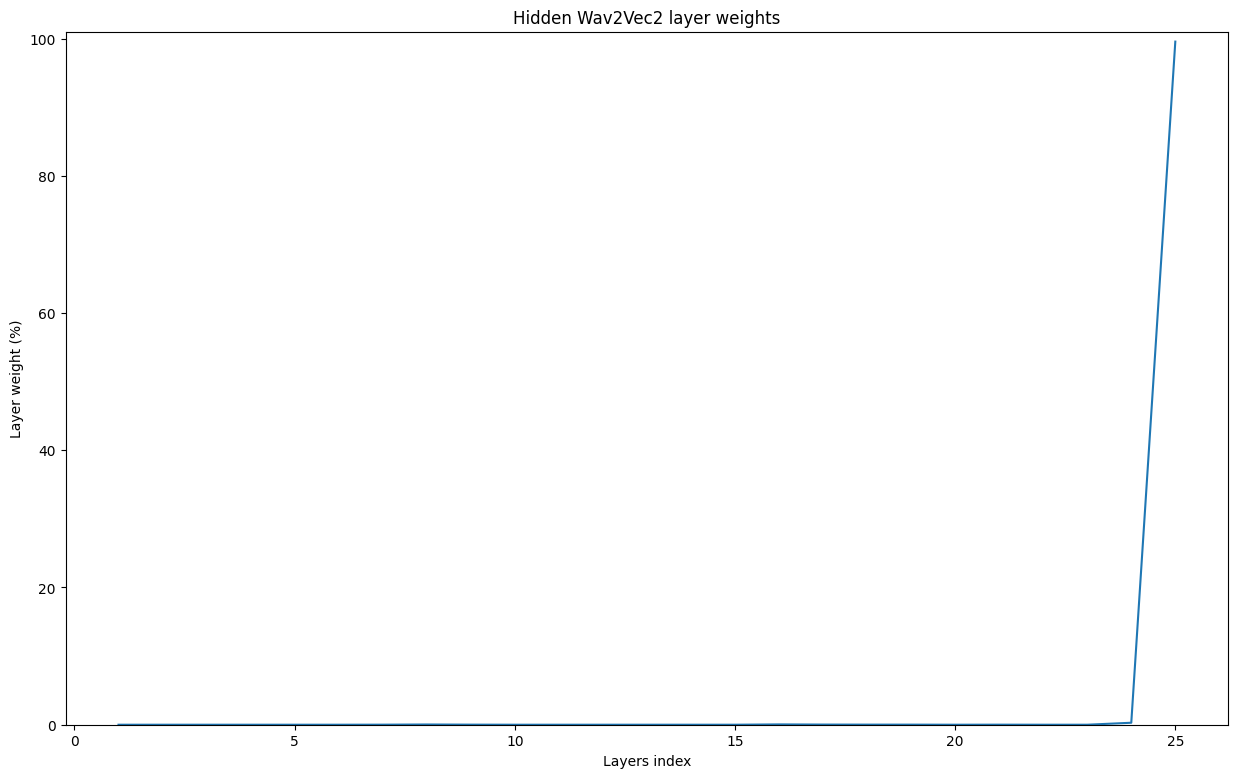

In [9]:
for i, w in enumerate([weights[-1]]):
    plt.figure(figsize=(15, 9))

    plt.title("Hidden Wav2Vec2 layer weights")
    plt.xlabel("Layers index")
    plt.ylabel("Layer weight (%)")
    plt.ylim([0.0, 101.0])

    plt.plot(range(1, len(w) + 1), w * 100)
    print(w)
    
    plt.savefig(f"validation_per_plot_{i}.png", bbox_inches="tight")

In [11]:
movements = np.array([np.array(a) - np.array(weights[0]) for a in weights[1:]])
movements.shape

(23, 25)

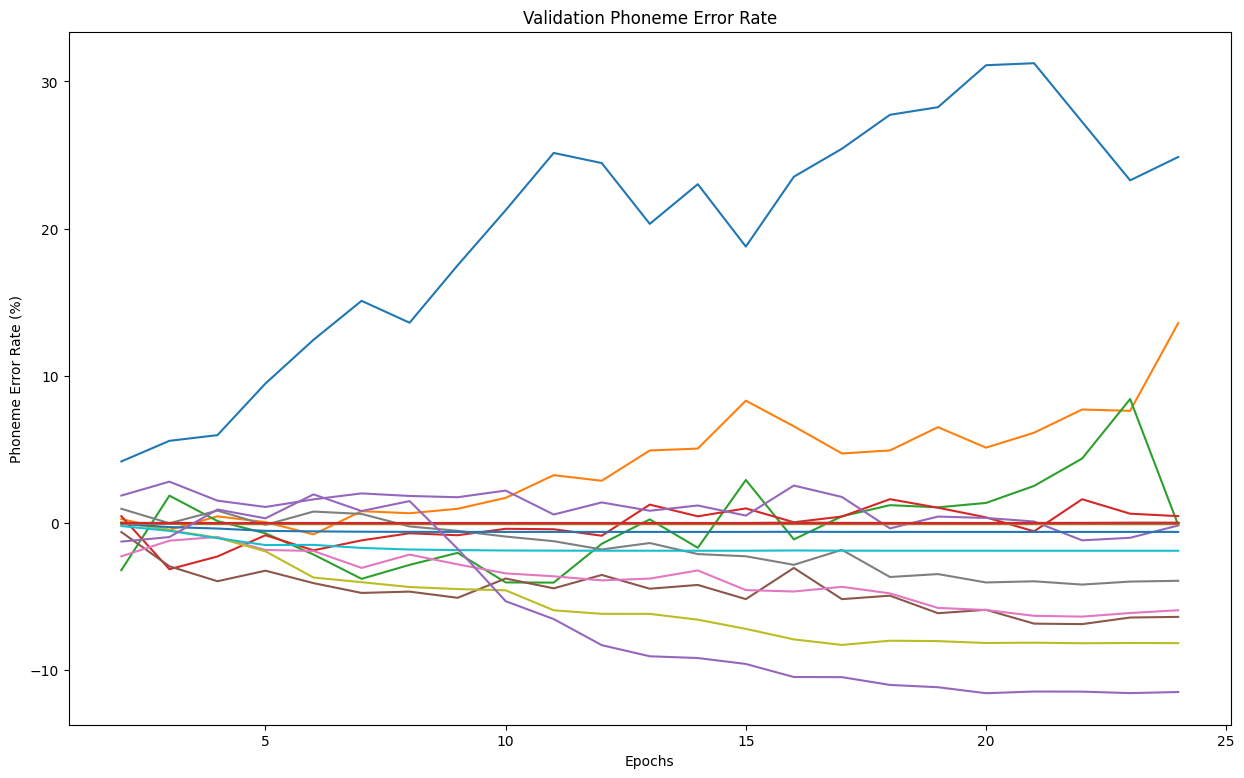

In [12]:
plt.figure(figsize=(15, 9))

plt.title("Validation Phoneme Error Rate")
plt.xlabel("Epochs")
plt.ylabel("Phoneme Error Rate (%)")

for i in range(movements.shape[1]):
    plt.plot(range(2, len(movements[:, i]) + 2), movements[:, i]*100, label=i)

## Fitting last weights using an exponential function

In [50]:
weights = np.array([4.64354948e-01, 1.77798206e-01, 1.46488838e-01, 8.49658350e-02,
                    5.17150703e-02, 3.04671555e-02, 1.80952457e-02, 9.56154414e-03,
                    2.27561247e-03, 8.32176773e-08, 1.37022464e-08, 4.37260872e-09,
                    2.08393887e-09, 1.62183754e-09, 1.41461837e-09, 1.19382184e-09,
                    1.11456009e-09, 1.24254264e-09, 1.23597458e-09, 1.37610878e-09,
                    1.98925420e-09, 4.19569833e-09, 1.75799631e-08, 2.41074138e-04,
                    1.40363337e-02])

layers = np.array((range(1, 26)))

b, a = np.polyfit(1 / layers, 1 / weights, 1)
m = 1 / a
k = b * m
print(m, k)
predicted = (m * layers) / (k + layers)

2.659700318298707e-09 -1.6791679120943128


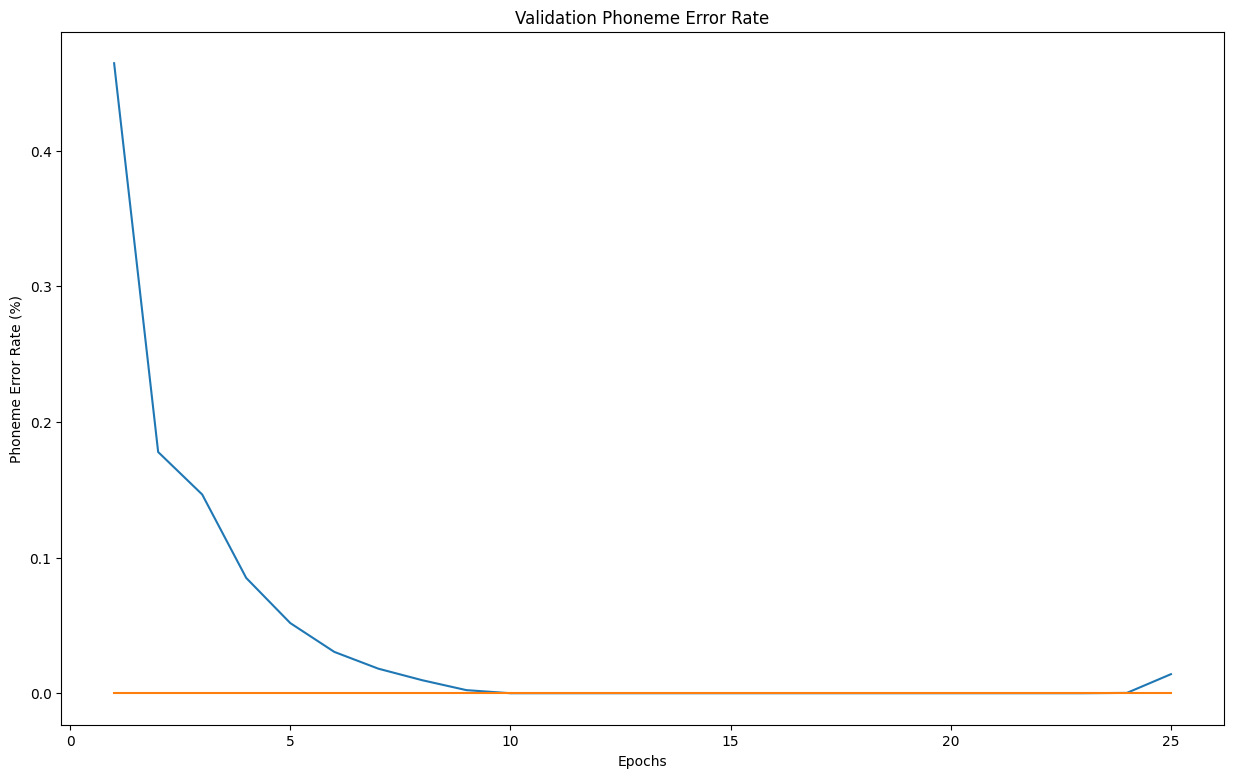

In [51]:
plt.figure(figsize=(15, 9))

plt.title("Validation Phoneme Error Rate")
plt.xlabel("Epochs")
plt.ylabel("Phoneme Error Rate (%)")

plt.plot(range(1, len(weights) + 1), weights, label="weights")
plt.plot(range(1, len(predicted) + 1), predicted, label="weights")

In [55]:
for w in weights:
    print(w)

0.464354948
0.177798206
0.146488838
0.084965835
0.0517150703
0.0304671555
0.0180952457
0.00956154414
0.00227561247
8.32176773e-08
1.37022464e-08
4.37260872e-09
2.08393887e-09
1.62183754e-09
1.41461837e-09
1.19382184e-09
1.11456009e-09
1.24254264e-09
1.23597458e-09
1.37610878e-09
1.9892542e-09
4.19569833e-09
1.75799631e-08
0.000241074138
0.0140363337


In [56]:
weights = re.findall(r"tensor\((\[[\s\d\.\,-]+\])", content)
weights = [softmax([float(n) for n in re.findall(r"[-\d\.]+", w)[:7]]) for w in weights]

In [57]:
weights

[array([0.30329127, 0.05910962, 0.20796996, 0.11296676, 0.07518063,
        0.1326075 , 0.10887426]),
 array([0.35868788, 0.06222473, 0.1613301 , 0.11831524, 0.10041912,
        0.12276262, 0.07626031]),
 array([0.36891463, 0.0507781 , 0.22618771, 0.06641781, 0.11075995,
        0.08810817, 0.08883363]),
 array([0.38252018, 0.06462371, 0.20728225, 0.0799484 , 0.09531445,
        0.07597326, 0.09433775]),
 array([0.41330508, 0.05670067, 0.18752009, 0.09584056, 0.08563431,
        0.08235886, 0.07864043]),
 array([0.45729127, 0.04603585, 0.16996976, 0.08300663, 0.09343075,
        0.07179541, 0.07847033]),
 array([0.48098668, 0.06566983, 0.14419111, 0.08984982, 0.09648037,
        0.06132206, 0.06150015]),
 array([0.4577404 , 0.0632631 , 0.15538443, 0.09542134, 0.09342904,
        0.06199181, 0.07276989]),
 array([0.48503031, 0.06413636, 0.15835057, 0.08935448, 0.08805058,
        0.05390436, 0.06117334]),
 array([0.5059751 , 0.06981071, 0.12700005, 0.09022328, 0.08917382,
        0.0668

Keeping: [0.47680661, 0.18256586, 0.15041693, 0.08724419, 0.05310181, 0.03128413, 0.01858047]

In [60]:
softmax([0, 0, 0, 0])

array([0.25, 0.25, 0.25, 0.25])

## Putting all curves on one graph

[0.46435494833391294, 0.177798206284396, 0.14648883803098847, 0.08496583501069323, 0.05171507032261811, 0.030467155503614847, 0.018095245688773975, 0.009561544137121784, 0.002275612472018267, 8.32176772830867e-08, 1.3702246433004743e-08, 4.372608722223313e-09, 2.0839388744940237e-09, 1.6218375436054314e-09, 1.4146183715071671e-09, 1.1938218417873911e-09, 1.1145600940783051e-09, 1.242542635398521e-09, 1.2359745801520252e-09, 1.3761087813554108e-09, 1.9892541959860627e-09, 4.1956983271303145e-09, 1.757996308813791e-08, 0.00024107413821274908, 0.014036333736798806]
[2.573427447371898e-10, 3.0157201202458926e-10, 4.11705724615062e-10, 6.825316048782072e-10, 2.2706214363144045e-09, 7.380071807145664e-07, 7.203832546614354e-05, 0.000329276648898552, 0.00010851607031732664, 1.2243355339117832e-06, 8.195362631272847e-08, 7.504353873170951e-07, 8.198066022484953e-06, 1.8866415213211945e-06, 1.6850551201703095e-06, 0.00045554671794566476, 0.00021697850113819856, 0.00013461223008626167, 0.0001143

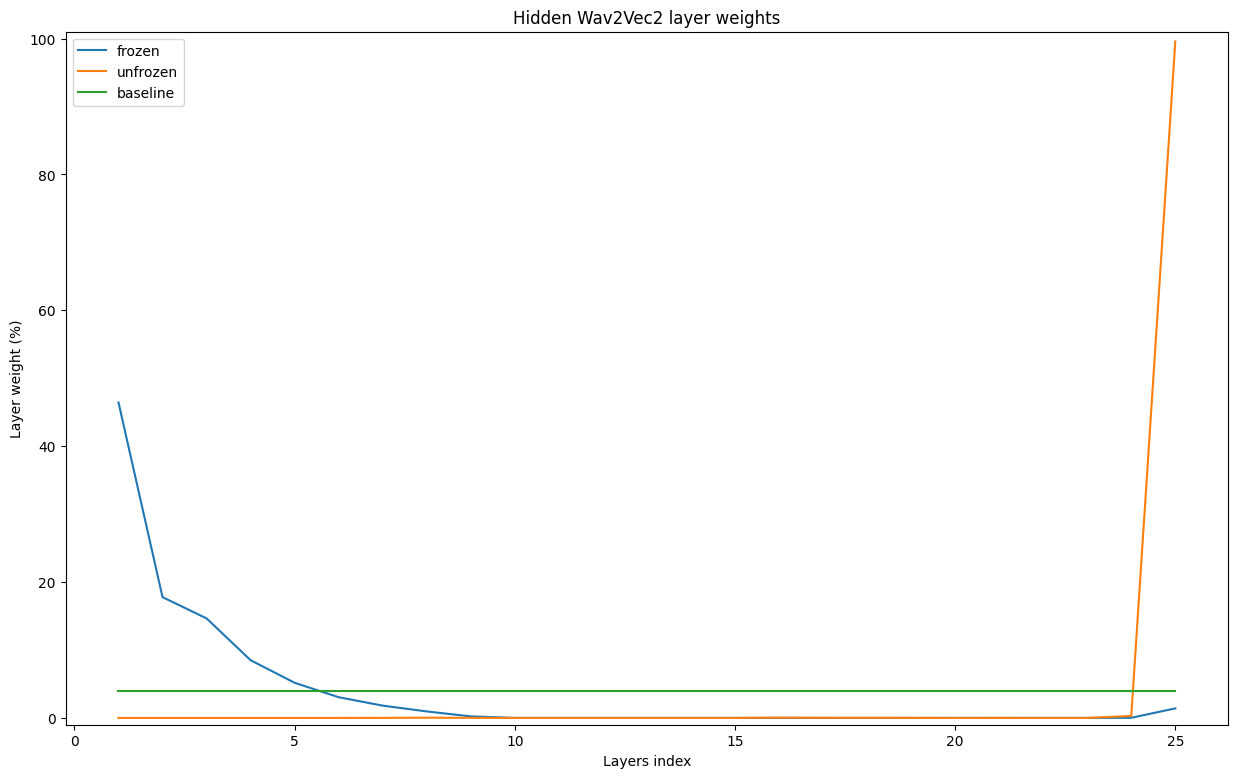

In [10]:
FILES = {
    "frozen": 'weights.txt',
    "unfrozen": 'weights-unfrozen.txt',
    "baseline": 'baseline.txt'
}

plt.figure(figsize=(15, 9))

plt.title("Hidden Wav2Vec2 layer weights")
plt.xlabel("Layers index")
plt.ylabel("Layer weight (%)")
plt.ylim([-1.0, 101.0])

for key, filename in FILES.items():
    with open(filename, "r") as f:
        content = f.read()
        content = content.replace("\n", "")
        
    weights = re.findall(r"tensor\((\[[\s\d\.\,-]+\])", content)
    weights = [softmax([float(n) for n in re.findall(r"[-\d\.]+", w)]) for w in weights][-1]

    plt.plot(range(1, len(weights) + 1), weights * 100, label=key)
    print(list(weights))

plt.legend()

plt.savefig(f"validation_per_plot.png", bbox_inches="tight")